15.077/IDS.147 Problem Set 2 (Python Version) <br>
**Name:** Chun-Hei Lam. **ID:** 928931321 <br>
**Declaration:** I pledge that the work submitted for this coursework is my own unassisted work unless stated otherwise. <br>
**Acknowledgement to:** Harry Yu

In [2]:
import numpy as np
from scipy.special import xlogy
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive
import seaborn as sns
import statsmodels.api as sm

# 8.66 Posterior Distribution

Let the unknown probability that a basketball player makes a shot successfully be $\theta$. Suppose your prior on $\theta$ is uniform on $[0,1]$ and that she then makes two shots in a row. Assume that the outcomes of the two shots are independent.

**Part (a):** What is the posterior density of $\theta$.

*Solution: Notice the prior is given as $p_\theta(\theta) = 1$ for all $\theta \in [0,1]$, and the likelihood is given as $p_{x|\theta}(x\,|\,\theta) = \theta^x (1-\theta)^{1-x}$ for all x \in \{0,1\}, we have the posterior density as $$p_{\theta|x_1,x_2}(\theta|x_1=1,\,x_2=1) \propto p_{x|\theta}(1\,|\,\theta)p_{x|\theta}(1\,|\,\theta)p_\theta(\theta) = \theta^2$$ Normalising (by dividing it over integral over $[0,1]$ yields the final density $p_{\theta|x_1,x_2}(\theta|x_1=1,\,x_2=1) = 3\theta^2$.*

Text(0.5, 1.0, 'posterior')

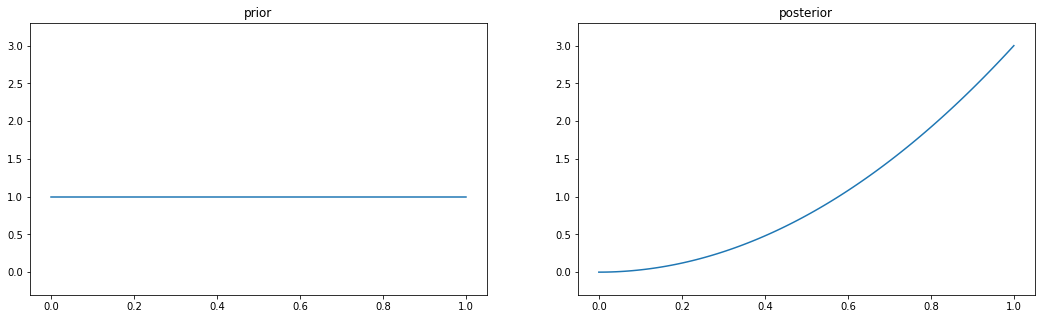

In [25]:
x1 = [0,1]; y1 = [1,1]
x2 = np.linspace(0,1,99); y2 = 3*(x2**2)
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,5))
ax1.plot(x1,y1)
ax1.set_ylim((-0.3,3.3))
ax1.set_title("prior")
ax2.plot(x2,y2)
ax2.set_ylim((-0.3,3.3))
ax2.set_title("posterior")

**Part (b):** What would you estimate the probability that she makes a third shot to be?

*Solution: We would use the posterior mean, i.e. $$\mathbb{E}(\theta\,|\,x_1=1,\,x_2=1)=\int_0^1 3\theta^3\, d\theta = \frac{3}{4}$$*

# 9.24 Sign Test

Let $X$ be a binomial random variable with $n$ trials and probability $p$ of success, i.e. $X \sim \text{B}(n,p)$.

**Part (a):** What is the generalised likelihood ratio for testinig $H_0: p=0.5$ versus $H_1: p \neq 0.5$.

*Solution: take it for granted that the MLE of p is $\hat{p}=X/n$, then the generalised likelihood ratio is
\begin{equation}
\Lambda = \frac{\sup_{p=0.5} \mathbb{P}(X=x \,|\, p)}{\sup_{p\in[0,1]} \mathbb{P}(X=x \,|\, p)} = \frac{\mathbb{P}(X=x \,|\, p=0.5)}{\mathbb{P}(X=x \,|\, p=x/n)} = \frac{C^n_x (1/2)^n}{C^n_x (x/n)^x (1-x/n)^{n-x}} = \frac{1}{2^n (x/n)^x (1-x/n)^{n-x}}
\end{equation}*

**Part (b):** Show that the test rejects for large values of $|X-n/2|$.

*Solution: the likelihood ratio test rejects when $T(x):=-2 \ln \Lambda(x)$ is large. Notice that
\begin{equation}
T(x) = 2 \left( n \ln 2 + x \ln \left( \frac{x}{n} \right) + (n-x) \ln \left( 1-\frac{x}{n} \right) \right), \quad x = 0,1,...,n
\end{equation}*
The following is a graph for $T(x)$ for varying $n$.

In [62]:
# set up plot
 
def T(x, n):
    return 2*(n*np.log(2)+xlogy(x,x/n)+xlogy(n-x,1-x/n))

def f(n):
    plt.figure(2)
    x = np.linspace(0,n,100)
    plt.plot(x, T(x,n))
    plt.scatter([n/2],[0],color="red")
    plt.ylim([0,7])
    plt.xlim([-0.3,5.3])
    plt.show

interactive_plot = interactive(f,n=(1,5))
output = interactive_plot.children[-1]
output.layout.height = "350px"
interactive_plot

interactive(children=(IntSlider(value=3, description='n', max=5, min=1), Output(layout=Layout(height='350px'))…

*As we can see, the function $T(x)$ is convex and have minimum at $x=n/2$ (if we extend $T$ so that it is defined on $[0,n]$). One can formally show this by taking derivative of $T$:
\begin{equation}
T'(x) = \ln\left(\frac{x}{n} \right) + 1 + \ln\left(1 - \frac{x}{n} \right) - 1 = \ln\left(\frac{x}{n} \left(1-\frac{x}{n} \right) \right)
\end{equation}
and that $T'(x) = 0$ iff $x = n/2$. Therefore the value of $T(x)$ is large whenever $|x-n/2|$ is large, and hence be rejected.*

**Part (c):** Using the null distribution of $X$, show how the significance level corresponding to a rejection region $|X-n/2|>k$ can be determined.

*Solution: The significance level is 
\begin{equation}
\mathbb{P}\left(\;\left| X - \frac{n}{2} \right| > k \; \bigg| \; H_0 \right) = \mathbb{P}\left(\; \left| X - \frac{n}{2} \right| > k \; \bigg| \; p=0.5 \right)
\end{equation}*

**Part (d):** If $n=10$ and $k=2$, what is the significance level of the test?

*Solution: Under $H_0$ we have $X\sim\text{B}(10,0.5)$ and hence $\alpha = \mathbb{P}(|X-5|>2\,|\,p=0.5) = 2\times \mathbb{P}(X \in \{0,1,2 \}\,|\,p=0.5)$*

In [7]:
2*stats.binom.cdf(2,10,0.5)

0.10937500000000003

**Part (e):** Use the normal approximation to the binomial distribution to find the significance level if $n=100$ and $k=10$.

*Solution: Under $H_0$ we have $X\sim\text{B}(100,0.5)$, which is approximately distributed with $Z\sim\text{N}(50,25)$. Therefore $\alpha = \mathbb{P}(|X-50|>10 \,|\, p=0.5) = \mathbb{P}(|Z-50|>10.5) = 2\times \mathbb{P}(Z<39.5)$. Note the continuity correction.*

In [8]:
2*stats.norm.cdf(39.5,50,5)

0.035728841125633085

This analysis is the basis of the sign test, a typical application of which would be something like this: An experimental drug is to be evaluated on laboratory rats. Innpairs of litter mates, one animal is given the drug and the other is given a placebo. A physiological measure of benefit is made after some time has passed. Let $X$ be the number of pairs for which the animal receiving the drug benefited more than its litter mate. A simple model for the distribution of $X$ if there is no drug effect is binomial with $p=0.5$. This is then the null hypothesis that must be made untenable by thedata before one could conclude that the drug had an effect.

# 9.38 Seasonality Variations in Suicide Rates

Yip et al. (2000) studied seasonal variations in suicide rates in England and Wales during 1982-1996, collecting counts shown in the following table:

In [3]:
suicide = pd.DataFrame({
    'Month' : ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"],
    'Male' : [3755, 3251, 3777, 3706, 3717, 3660, 3669, 3626, 3481, 3590, 3605, 3392],
    'Female' : [1362, 1244, 1496, 1452, 1448, 1376, 1370, 1301, 1337, 1351, 1416, 1226] })
suicide.T

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec
Male,3755,3251,3777,3706,3717,3660,3669,3626,3481,3590,3605,3392
Female,1362,1244,1496,1452,1448,1376,1370,1301,1337,1351,1416,1226


Do either the male or female data show seasonality?

*Solution: We follow the procedure in 9.36. we first calculate the total counts:*

In [13]:
male_total = sum(suicide["Male"])
female_total = sum(suicide["Female"])
print(f"Total count for male is {male_total}.")
print(f"Total count for female is {female_total}.")

Total count for male is 43229.
Total count for female is 16379.


*We then perform a Goodness-of-fit test to test whether the data exhibits seasonality. Notice that the counts of male/female in each month is multinomially $\text{Multinomial}(\vec{p} = (p_1,...,p_{12}))$ distributed , with $p_1+...+p_{12}=1$. In particular, if no seasonality is present then $p_i \propto$ number of days present in the $i$-th month. We therefore set up the hypothesis test as following: $H_0: \vec{p} = \vec{p}_0 := (31,28,31,...,31)/365$ and $H_1: \vec{p} \neq \vec{p}_0$. **Remark**: One may also assume a simplified model with $\vec{p}_0 = (1,1,...,1)/12$. We will discuss the effect of choosing this model later.*

In [17]:
p0 = np.array([31,28,31,30,31,30,31,31,30,31,30,31])/365

Under $H_0$, the expected count is as followed.

In [18]:
suicide_exp = pd.DataFrame({
    'Month' : ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"],
    'Male' : male_total*p0,
    'Female' : female_total*p0 })
suicide_exp.T

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec
Male,3671.5,3316.2,3671.5,3553.07,3671.5,3553.07,3671.5,3671.5,3553.07,3671.5,3553.07,3671.5
Female,1391.09,1256.47,1391.09,1346.22,1391.09,1346.22,1391.09,1391.09,1346.22,1391.09,1346.22,1391.09


We may then obtain the $\chi^2$ statistic. Notice that the $\chi^2$ statistic follows a $\chi^2_{11}$ distribution. We may then look at the p-values. In python this could be done using the `chisquare` function in the `scipy.stats` library. 

In [24]:
male_chisq, male_p = stats.chisquare(suicide["Male"], suicide_exp["Male"])
female_chisq, female_p = stats.chisquare(suicide["Female"], suicide_exp["Female"])
print(f"For Male: chisq statistic is {male_chisq}, and p-value is {male_p}")
print(f"For Female: chisq statistic is {female_chisq}, and p-value is {female_p}")

For Male: chisq statistic is 42.45023462019279, and p-value is 1.3533488959557966e-05
For Female: chisq statistic is 50.525646061153765, and p-value is 5.034272315862472e-07


The p-value is very small, compared with typical significance level, say $5\%$. With this significance level, we reject $H_0$ for both male and female. The data provided is not compatible with the hypothesis that no seasonality is present, so there might be seasonality present in suicide rate which worth further investigation.

**Remark:** If we use a simpler model with $\vec{p}_0 = (1,1,...,1)/12$ then we get the following result:

In [27]:
male_chisq_simpler, male_p_simpler = stats.chisquare(suicide["Male"])
female_chisq_simpler, female_p_simpler = stats.chisquare(suicide["Female"])
print(f"For Male: chisq statistic is {male_chisq_simpler}, and p-value is {male_p_simpler}")
print(f"For Female: chisq statistic is {female_chisq_simpler}, and p-value is {female_p_simpler}")

For Male: chisq statistic is 74.56020264174514, and p-value is 1.6459364267971953e-11
For Female: chisq statistic is 53.78564014897123, and p-value is 1.2915331595643268e-07


As we might have have expected, we are rejecting $H_0$ with $5\%$ (or even lower) significance level. However I prefer the previous model which takes number of dates into account since this is more accurate - this is indicated by an increase in the  $\chi^2$ statistics (especially for male). 

# 9.47 Variance Stabilizing Transformation

Let $X$ follow a Poisson distribution with mean $\lambda$. Show that the transformation $Y=\sqrt{X}$ is variance-stabilizing.

*Solution: Notice that $\text{Var}(X) = \sigma^2(\lambda) := \lambda$ and $g(\lambda) := \sqrt{\lambda}$ has derivative $g'(\lambda) = 1/(2\sqrt{\lambda})$. By $\delta$-method, we have 
\begin{equation}
\text{Var}(Y) = \sigma^2(\lambda) (g'(\lambda))^2 = \lambda \, \left( \frac{1}{2\sqrt{\lambda}}\right)^2 = \frac{1}{4}
\end{equation}
which is somewhat independent with the mean. Thus the transformation is variance stabilizing.*

# 9.61 Volatility of Stocks

The files `haliburton` and `macdonalds` give the monthly returns on the stocks of these two companies from 1975 through 1999.

In [31]:
haliburton = pd.read_csv("./haliburton.txt", header=None)
macdonalds = pd.read_csv("./macdonalds.txt", header=None)

In [49]:
haliburton.columns

Int64Index([0], dtype='int64')

**Part (a):** Make histograms of the returns and superimpose fitted normal densities. Comment on the quality of the fit. Which stock is more volatile?

*Solution: see https://stackoverflow.com/questions/17874063/is-there-a-parameter-in-matplotlib-pandas-to-have-the-y-axis-of-a-histogram-as-p for normalisation.*

Text(0.5, 1, 'macdonalds (mean=0.0164, sd=0.066)')

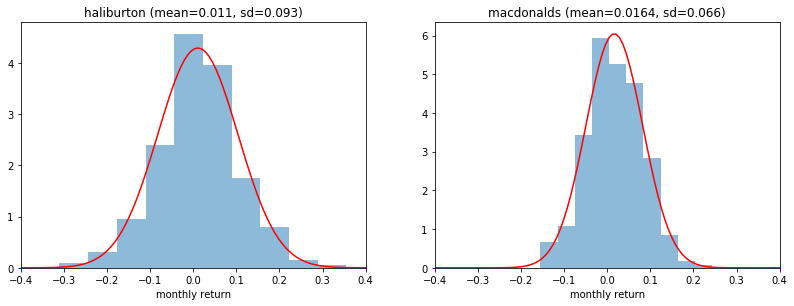

In [85]:
x = np.linspace(-0.4,0.4,100)

fig, ax = plt.subplots(nrows=1, ncols=2)

fig.tight_layout() 
fig.subplots_adjust(wspace=0.2, hspace=0.2) 
fig.set_figwidth(12)
fig.set_figheight(4)

ax[0].hist(haliburton[0], density=True, alpha=0.5)
ax[0].plot(x,stats.norm.pdf(x,haliburton.mean()[0],haliburton.std()[0]),color="red")
ax[0].set_xlim([-0.4,0.4])
ax[0].set_xlabel("monthly return")
ax[0].set_title(f"haliburton (mean={np.round(haliburton.mean()[0], 4)}, sd={np.round(haliburton.std()[0], 4)})")

ax[1].hist(macdonalds[0], density=True, alpha=0.5)
ax[1].plot(x,stats.norm.pdf(x,macdonalds.mean()[0],macdonalds.std()[0]),color="red")
ax[1].set_xlim([-0.4,0.4])
ax[1].set_xlabel("monthly return")
ax[1].set_title(f"macdonalds (mean={np.round(macdonalds.mean()[0], 4)}, sd={np.round(macdonalds.std()[0], 4)})")

*I would say the haliburton stock is more volatile since it has a higher fitted standard deviation. The fit is reasonably good, since the shape of density is generally captured, and is not shifted from the histogram.*

**Part (b):** Make normal probability plots and again comment on the quality of the fit.

*Solution: We use qqplot to look at the quality of fit.*

Text(0.5, 1, 'mcdonalds')

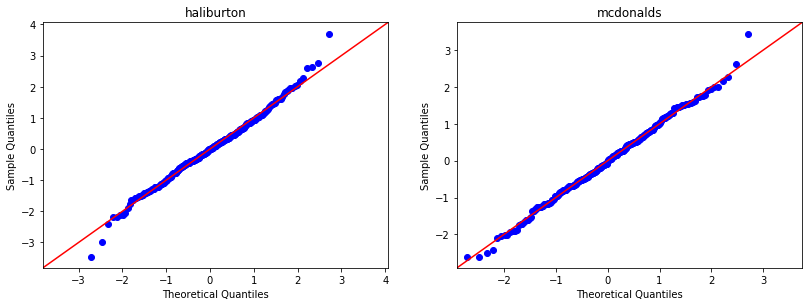

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=2)

fig.tight_layout() 
fig.subplots_adjust(wspace=0.2, hspace=0.2) 
fig.set_figwidth(12)
fig.set_figheight(4)

sm.qqplot(haliburton[0], stats.norm, fit=True, ax=ax[0], line="45")
ax[0].set_title("haliburton")
sm.qqplot(macdonalds[0], stats.norm, fit=True, ax=ax[1], line="45")
ax[1].set_title("mcdonalds")

*The fit is good since most of the points lie on the "$y=x$" line, indicates that the sample quantiles for each data points matches the theoretical quanties. One thing to note: there are some outliers at both ends of haliburton and upper end of mcdonalds. I would say the distribution of haliburton returns is slightly heavy-tailed, while the distribution of mcdonalds returns is slightly right-skewed.*

# 14.7 Weighted Least Squares

Suppose that in the model $y_i = \beta_0 + \beta_1 x_i + e_i$, the errors have mean zero and are independent, but $\text{Var}(e_i) = \rho^2_i \sigma^2$, where the $\rho_i$ are known constants, so the errors do not have equal variance. This situation arises when the $y_i$ are averages of several observations at $x_i$; in this case, if $y_i$ is an average of $n_i$ independent observations, $\rho^2_i = 1/n_i$. Because the variances are not equal, the theory developed in this chapter does not apply; intuitively, it seems that the observations with large variability should influence the estimates of $\beta_0$ and $\beta_1$ less than the observations with small variability. The problem may be transformed as follows:
\begin{equation}
\rho^{-1}_i y_i = \rho^{-1}_i \beta_0 + \rho^{-1}_i \beta_1 x_i + \rho_i^{-1} e_i
\end{equation}
or 
\begin{equation}
z_i = u_i \beta_0 + v_i \beta_1 + \delta_t, \quad u_i = \rho^{-1}_i, v_i = \rho_i^{-1} x_i \;\text{and}\; \delta_i = \rho_i^{-1} e_i
\end{equation}

**Part (a):** Show that the new model satisfies the assumptions of the standard statistical model. 

*Solution: Clearly the $\delta_i$'s are independent. Notice $\text{Var}(\delta_i) = \text{Var}(\rho_i^{-1}e_i) = \rho_i^{-2} \text{Var}(e_i) = \rho_i^{-2} \rho_i^2 \sigma^2 = \sigma^2$. So the variances are constant, and the normal assumption holds.*

**Part (b):**  Find the least squares estimates of $\beta_0$ and $\beta_1$.

*Solution: It is much more convenient to express in vector notation. Define 
\begin{equation*}
\vec{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{pmatrix}, \quad X = \begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_N \end{pmatrix}, \quad \vec{e} = \begin{pmatrix} e_1 \\ e_2 \\ \vdots \\ e_N \end{pmatrix}, \quad \vec{\beta} = \begin{pmatrix} \beta_0 \\ \beta_1 \end{pmatrix}, \quad V = \begin{pmatrix} \rho_1 & & & \\ & \rho_2 & & \\ & & \ddots & \\ & & & \rho_N \end{pmatrix}
\end{equation*}
Then we have $\text{cov}(\vec{Y}) = \sigma^2 V^2$. The model is then transformed to
\begin{equation}
V^{-1} \vec{Y} = V^{-1} X \vec{\beta} + V^{-1} \vec{e}
\end{equation}
And the least square estimator for $\vec{\beta}$ is
\begin{equation}
\hat{\beta} = ((V^{-1} X)^T (V^{-1} X))^T (V^{-1} X)^T V^{-1} \vec{y} = (X^T V^{-2} X)^{-1} X^T V^{-2} \vec{y}
\end{equation}*

To obtain $\hat{\beta}_0$ and $\hat{\beta}_1$ in terms of $x_i$ and $y_i$ we consider the matrices:
\begin{equation}
X^T V^{-2} X = \begin{pmatrix}
 \sum \rho_i^{-2} & \sum \rho_i^{-2} x_i \\ \sum \rho_i^{-2} x_i & \sum \rho_i^{-2} x_i^2
\end{pmatrix}
\end{equation}
with inverse
\begin{equation}
(X^T V^{-2} X)^{-1} = \frac{1}{\sum \rho_i^{-2} \sum \rho_i^{-2} x_i^2 - (\sum \rho_i^{-1} x_i)^2} \begin{pmatrix}
 \sum \rho_i^{-2} x_i^2 & -\sum \rho_i^{-2} x_i \\ -\sum \rho_i^{-2} x_i & \sum \rho_i^{-2}
\end{pmatrix}
\end{equation}
Moreover we have 
\begin{equation}
X^T V^{-1} \vec{y} = \begin{pmatrix} \sum \rho_i^{-2} y_i \\ \sum \rho_i^{-2} x_i y_i \end{pmatrix}
\end{equation}

and therefore we have \begin{equation}
\hat{\beta}(\vec{y}) = \frac{1}{\sum \rho_i^{-2} \sum \rho_i^{-2} x_i^2 - (\sum \rho_i^{-1} x_i)^2} \begin{pmatrix}
 \sum \rho_i^{-2} x_i^2 \sum \rho_i^{-2} y_i - \sum \rho_i^{-2} x_i \sum \rho_i^{-2} x_i y_i  \\ \sum \rho_i^{-2} \sum \rho_i^{-2} x_i y_i - \sum \rho_i^{-2} x_i \sum \rho_i^{-2} y_i
\end{pmatrix}
\end{equation}

**Part (c):** Show that performing a least squares analysis on the new model, as was done in part (b), is equivalent to minimizing \begin{equation}
\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2 \rho_i^{-2}
\end{equation}
This is a weighted least squares criterion; the observations with large variances areweighted less.

*Solution: This is almost trivial: just notice that for all $i$, we have
\begin{equation}
(z_i - u_i \beta_0 - v_i \beta_1)^2 = (\rho_i^{-1} y_i - \rho_i^{-1} u_i \beta_0 - \rho_i^{-1} v_i \beta_1)^2 = \rho_i^{-2} (y_i - \beta_0 - \beta_1 x_i)^2
\end{equation}*

**Part (d):** Find the variances of the estimates of part (b).

*Solution: Just note that 
\begin{align}
\text{cov}(\hat{\beta}(\vec{Y})) &= ((X^T V^{-2} X)^{-1} X^T V^{-2}) \; \text{cov}(\vec{Y}) \; ((X^T V^{-2} X)^{-1} X^T V^{-2})^T = \sigma^2 (X^T V^{-2} X)^{-1}
\end{align}
where $(X^T V^{-2} X)$ has been calculated above after some hard work. We therefore have 
\begin{gather}
\text{Var}(\hat{\beta}_0) = \frac{\sum \rho_i^{-2} x_i^2}{\sum \rho_i^{-2} \sum \rho_i^{-2} x_i^2 - (\sum \rho_i^{-1} x_i)^2}\\
\text{Var}(\hat{\beta}_1) = \frac{\sum \rho_i^{-2} }{\sum \rho_i^{-2} \sum \rho_i^{-2} x_i^2 - (\sum \rho_i^{-1} x_i)^2}\\
\end{gather}*

# 14.55 Gasoline and Vapor

When gasoline is pumped into the tank of an automobile, hydrocarbon vapors in the tank are forced out and into the atmosphere, producing a significant amount of air pollution. For this reason, vapor-recovery devices are often installed on gasoline pumps. It is difficult to test a recovery device in actual operation, because all that can be measured is the amount of vapor actually recovered and, by means of a "sniffer", whether any vapor escaped into the atmosphere. To estimate the efficiency of the device, it is thus necessary to estimate the total amount of vapor in the tank by using its relation to the values of variables that can actually be measured. In this exercise, you will try to develop such a predictive relationship using data that were obtained in a laboratory experiment. The file `gasvapor` contains recordings of the following variables: initial tank temperature (F) temperature of the dispensed gasoline (F), initial vapor pressure in the tank (psi), vapor pressure of the dispensed gasoline (psi), and emitted hydrocarbons (g). **A prediction of emitted hydrocarbons is desired.** <br> 

First, randomly select 40 observations and set them aside. You will develop a predictive relationship based on the remaining observations and then test its strengthon the observations you have held out.

In [4]:
gas_train = pd.read_csv("./gasvapor_train.txt", quotechar="'")
gas_test = pd.read_csv("./gasvapor_test.txt", quotechar="'")   # the reserved 40 observations

**Part (a):** Look at the relationships among the variables by scatterplots. Comment on which relationships look strong. Based on this information, what variables would you conjecture will be important in the model? Do the plots suggest that transformations will be helpful? Do there appear to be any outliers?

*Solution: We first look at the pairplot.*

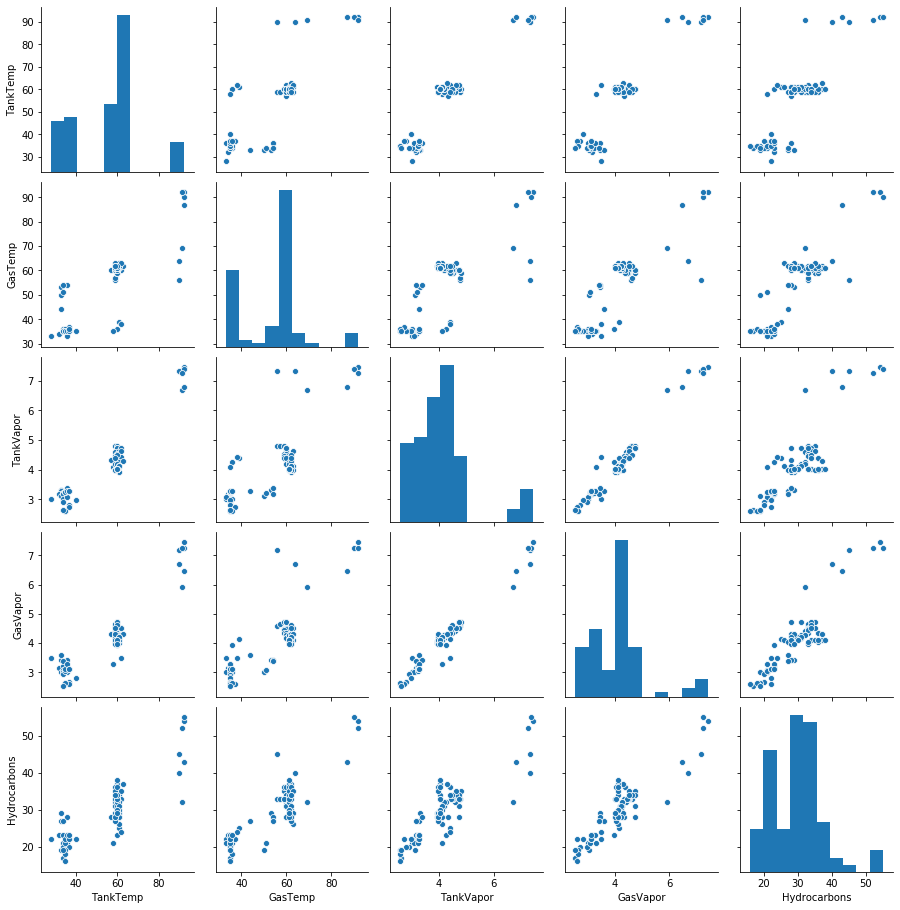

In [5]:
sns.pairplot(gas_train)

*One may also look at the correlation matrix.*

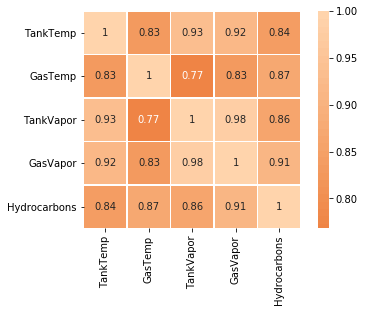

In [12]:
p = sns.heatmap(gas_train.corr(), center=0, annot=True, square=True, linewidths=.5)

*As we can see, most of the data are highly correlated. The correlation between `GasVapor` and `TankVapor` is alarming, so we might possibly remove one of them. The correlation between `TankTemp` and `TankVapor` worth more careful treatment as well.*<br>

*For transformation, the plot above shows that the experiment was conducted with three choices of `TankTemp`. One may consider using factor model (which is not covered in class until now!) Other than that, I do not think transformation is needed.*

**Part (b):** Try fitting a few different models and select two that you think are the best.

*Solution: As we have discussed, no transformation is needed for the model. Therefore we use backward selection to select the two "best" models. (Clearly they are not the best objectively, it is just a systematic yet naive way to select variables). We begin with the full model containing all variables.*

In [63]:
X = gas_train[[
    'TankTemp', 
    'GasTemp', 
    'TankVapor', 
    'GasVapor']]
X = sm.add_constant(X)
model = sm.OLS(gas_train['Hydrocarbons'], X )
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Hydrocarbons   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     142.7
Date:                Thu, 04 Mar 2021   Prob (F-statistic):           1.39e-35
Time:                        23:57:54   Log-Likelihood:                -203.98
No. Observations:                  85   AIC:                             418.0
Df Residuals:                      80   BIC:                             430.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5676      1.301      0.436      0.664      -2.021       3.156
TankTemp      -0.0264      0.065     -0.409      0.683      -0.155       0.102
GasTemp        0.1848      0.052      3.542      0.001       0.081       0.289
TankVapor     -2.4630      1.988     -1.239      0.219      -6.419       1.493
GasVapor       7.4800      2.003      3.735      0.000       3.494      11.466
==============================================================================
Omnibus:                        0.317   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.853   Jarque-Bera (JB):                0.088
Skew:                           0.070   Prob(JB):                        0.957
Kurtosis:                       3.072   Cond. No.                         748.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*We drop the variable having the highest p-value (excluding intercepts), thaht is `TankTemp` in our case.*

In [14]:
X = gas_train[[
#    'TankTemp', 
    'GasTemp', 
    'TankVapor', 
    'GasVapor']]
X = sm.add_constant(X)
model1 = sm.OLS(gas_train['Hydrocarbons'], X )
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Hydrocarbons   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 10 Mar 2021   Prob (F-statistic):           1.00e-36
Time:                        00:33:30   Log-Likelihood:                -204.07
No. Observations:                  85   AIC:                             416.1
Df Residuals:                      81   BIC:                             425.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6891      1.260      0.547      0.586      -1.817       3.196
GasTemp        0.1725      0.042      4.064      0.000       0.088       0.257
TankVapor     -2.9611      1.564     -1.894      0.062      -6.072       0.150
GasVapor       7.7619      1.871      4.148      0.000       4.039      11.485
==============================================================================
Omnibus:                        0.107   Durbin-Watson:                   0.996
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.027
Skew:                           0.041   Prob(JB):                        0.987
Kurtosis:                       2.971   Cond. No.                         462.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*We further drop the variable having the highest p-value (excluding intercepts), thaht is `TankVapor` in our case.*

In [15]:
X = gas_train[[
#    'TankTemp', 
    'GasTemp',
#    'TankVapor',
    'GasVapor']]
X = sm.add_constant(X)
model2 = sm.OLS(gas_train['Hydrocarbons'], X )
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Hydrocarbons   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     277.7
Date:                Wed, 10 Mar 2021   Prob (F-statistic):           3.05e-37
Time:                        00:33:33   Log-Likelihood:                -205.91
No. Observations:                  85   AIC:                             417.8
Df Residuals:                      82   BIC:                             425.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5590      1.278      0.438      0.663      -1.983       3.101
GasTemp        0.2065      0.039      5.282      0.000       0.129       0.284
GasVapor       4.3497      0.512      8.492      0.000       3.331       5.369
==============================================================================
Omnibus:                        1.780   Durbin-Watson:                   0.939
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                1.185
Skew:                          -0.129   Prob(JB):                        0.553
Kurtosis:                       3.517   Cond. No.                         241.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*The algorithm of backward selection shall terminate since the p-value for non-constant variables are very small (say, less than $5\%$). We have therefore obtain the two "best" models.*

**Part (c):** Using these two models, predict the responses for the 40 observations you haveheld out.

In [20]:
predict_test1 = results1.predict(sm.add_constant(gas_test[['GasTemp','TankVapor','GasVapor']]))
predict_test2 = results2.predict(sm.add_constant(gas_test[['GasTemp','GasVapor']]))

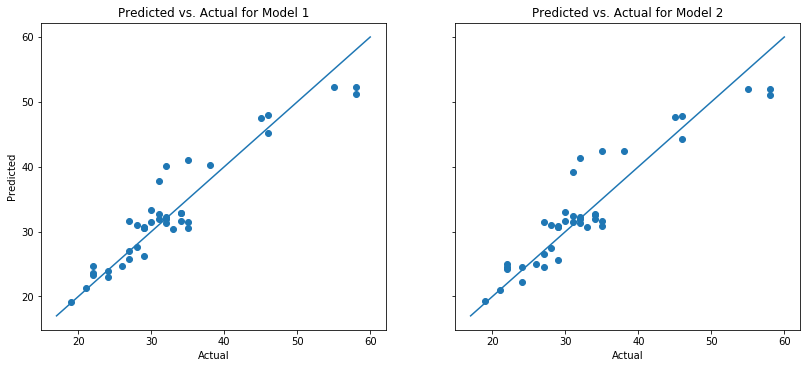

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2)

fig.tight_layout() 
fig.subplots_adjust(wspace=0.2, hspace=0.2) 
fig.set_figwidth(12)
fig.set_figheight(5)

xmin = gas_test["Hydrocarbons"].min() - 2
xmax = gas_test["Hydrocarbons"].max() + 2

ax[0].scatter(gas_test["Hydrocarbons"], predict_test1) # create scatter on each subplot
ax[0].plot([xmin, xmax], [xmin,xmax])
ax[0].set_title("Predicted vs. Actual for Model 1")  # give each subplot a title
ax[0].set(xlabel="Actual", ylabel="Predicted") # label each set of axes

ax[1].scatter(gas_test["Hydrocarbons"], predict_test2) # create scatter on each subplot
ax[1].plot([xmin, xmax], [xmin,xmax])
ax[1].set_title("Predicted vs. Actual for Model 2")  # give each subplot a title
ax[1].set(xlabel="Actual", ylabel="Predicted") # label each set of axes

for ax in ax.flat:
    ax.label_outer()

*I think the plot looks almost the same, so there isn't a significant improvement when the variable `TankVapor` is added.*

Plot prediction errors versus each of the indepen-dent variables.

In [21]:
err1 = gas_test["Hydrocarbons"] - predict_test1
err2 = gas_test["Hydrocarbons"] - predict_test2

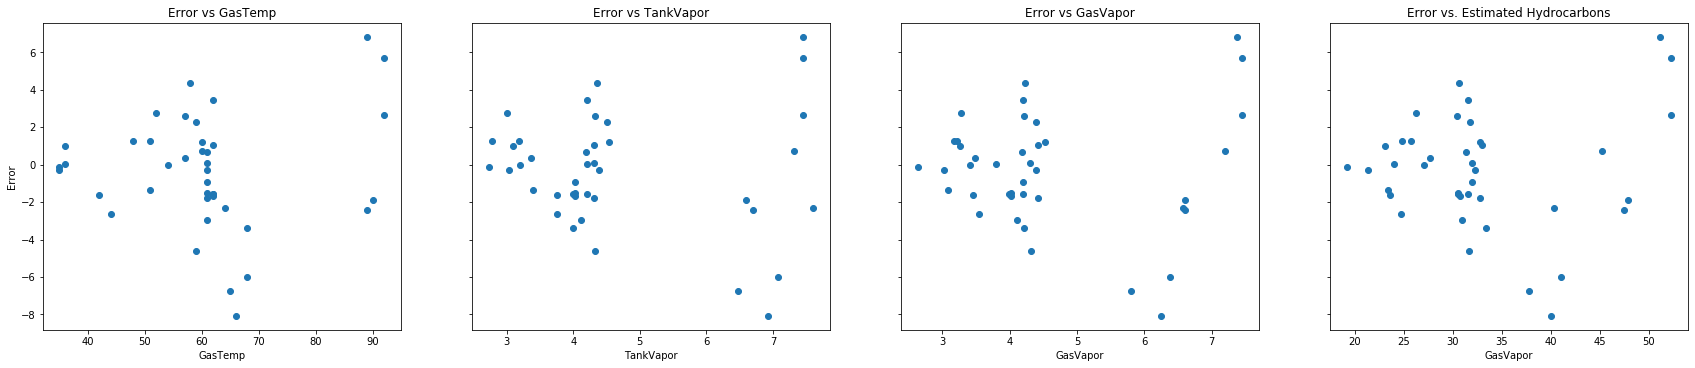

In [38]:
namesArray = ['GasTemp', 'TankVapor', 'GasVapor']
dataArray = np.array(gas_test[namesArray])
fig, ax = plt.subplots(nrows=1, ncols=4)

fig.tight_layout() 
fig.subplots_adjust(wspace=0.2, hspace=0.2) 
fig.set_figwidth(26)
fig.set_figheight(5)

for i in range(3):
    ax[i].scatter(dataArray[:,i], err1) # create scatter on each subplot
    ax[i].set_title("Error" + ' vs ' + namesArray[i]) # give each subplot a title
    ax[i].set(xlabel=namesArray[i], ylabel="Error") # label each set of axes
    
ax[3].scatter(predict_test1, err1) # create scatter on each subplot
ax[3].set_title("Error vs. Estimated Hydrocarbons") # give each subplot a title
ax[3].set(xlabel=namesArray[i], ylabel="Error") # label each set of axes
    
for ax in ax.flat:
    ax.label_outer()

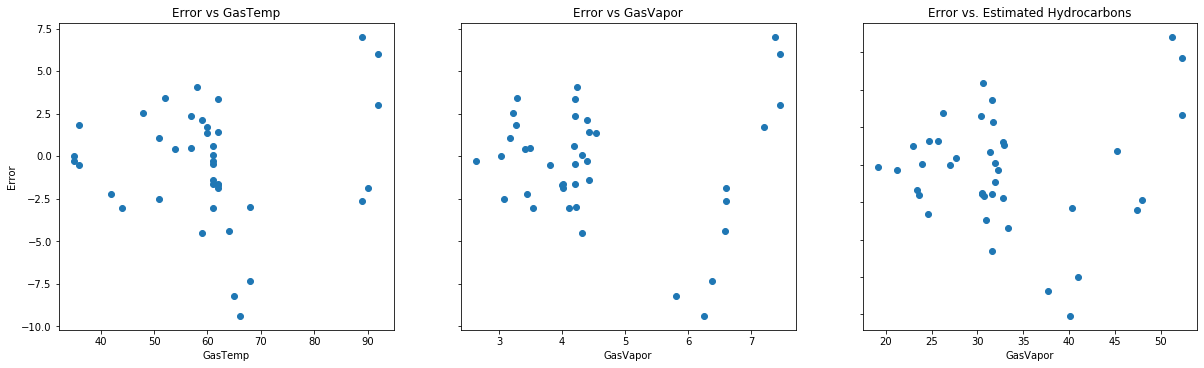

In [39]:
namesArray = ['GasTemp', 'GasVapor']
dataArray = np.array(gas_test[namesArray])
fig, ax = plt.subplots(nrows=1, ncols=3)

fig.tight_layout() 
fig.subplots_adjust(wspace=0.2, hspace=0.2) 
fig.set_figwidth(18)
fig.set_figheight(5)

for i in range(2):
    ax[i].scatter(dataArray[:,i], err2) # create scatter on each subplot
    ax[i].set_title("Error" + ' vs ' + namesArray[i]) # give each subplot a title
    ax[i].set(xlabel=namesArray[i], ylabel="Error") # label each set of axes

ax[2].scatter(predict_test1, err1) # create scatter on each subplot
ax[2].set_title("Error vs. Estimated Hydrocarbons") # give each subplot a title
ax[2].set(xlabel=namesArray[i], ylabel="Error") # label each set of axes
    
for ax in ax.flat:
    ax.label_outer()

*Again the set of plots aren't significantly different as expected. I think the plots between error and independent variables are satisfactory. No further correlation is exhibited. However, the `error` vs. estimated hydrocarbons plots indicate that Heteroscedasticity is present in our model. It is now apparent that a log transform on `hydrocarbon` data should have been done, but note this is not apparent when doing initial diagonistics. Therefore I will not include the new model here.*

Summarize the strength of the prediction by the root mean square prediction error:
\begin{equation}
\text{RMSPE} = \sqrt{\frac{1}{40} \sum_{i=1}^{40} (Y_i - \hat{Y}_i)^2 }
\end{equation}
where $Y_i$ is the $i$-th observed value and $\hat{Y}_i$ is the predicted value.

In [41]:
rmspe1 = np.sqrt(np.sum(err1**2)/40)
rmspe2 = np.sqrt(np.sum(err2**2)/40)
print(f"The rmspe of first model is {rmspe1}.")
print(f"The rmspe of second model is {rmspe2}.")

The rmspe of first model is 3.0510681222820897.
The rmspe of second model is 3.446586830789645.


They have similar values.